<a href="https://colab.research.google.com/github/KULLAPAVANI/Fmml2024/blob/main/_Module_9_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

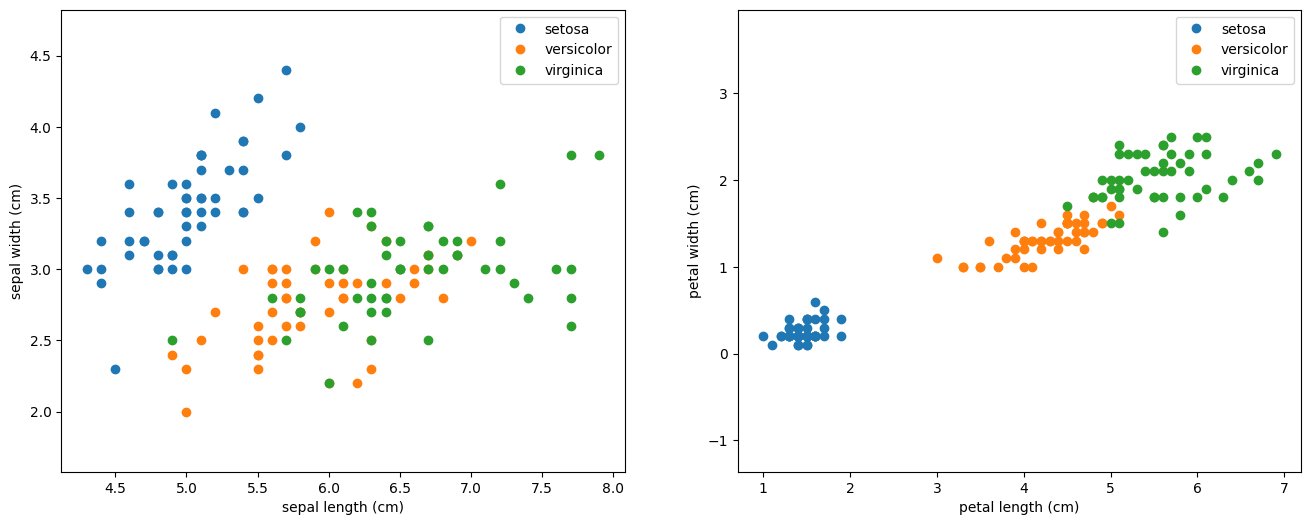

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [ ]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [ ]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 393.61it/s]


# Plot training progress

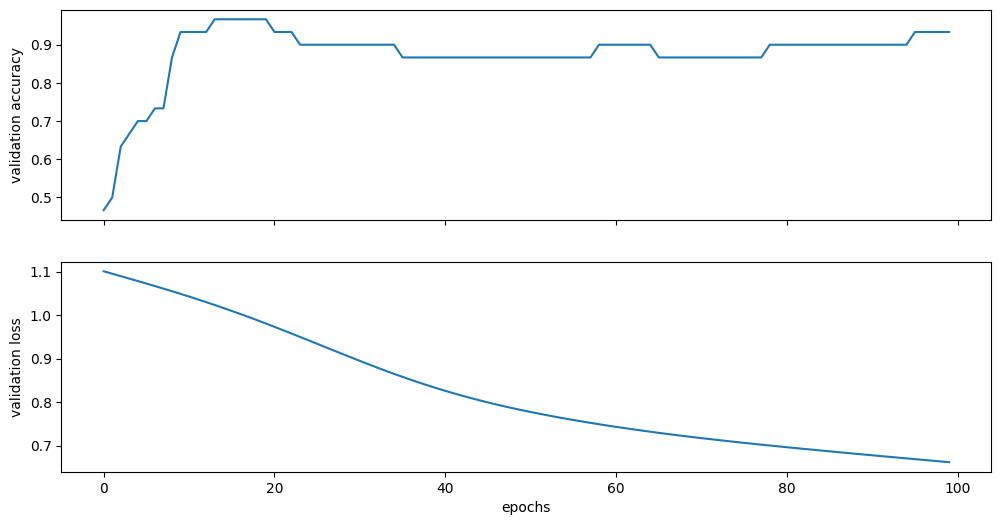

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
To better assist you, could you please provide more context or specify which model or architecture you are referring to when asking to change the number of hidden layers? This will help me provide a more accurate and relevant response.

2.   Try changing the number of neurons in the hidden layer.

To change the number of neurons in the hidden layer, you would typically adjust the architecture of your neural network model. Here's a simple example using Python with the Keras library:

Adjusting Neurons in Hidden Layer
```
from keras.models import Sequential
from keras.layers import Dense

Define the model architecture
model = Sequential()

Input layer with 10 neurons, and a hidden layer with adjustable neurons
model.add(Dense(units=10, activation='relu', input_dim=10))  # Input layer
model.add(Dense(units=64, activation='relu'))  # Hidden layer with 64 neurons (adjustable)

Output layer
model.add(Dense(units=1))

Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Summary of the model
model.summary()
```

Adjusting the Number of Neurons
To change the number of neurons in the hidden layer, simply adjust the `units` parameter in the hidden layer definition. For example, to change from 64 neurons to 128 neurons:

```
model.add(Dense(units=128, activation='relu'))  # Hidden layer with 128 neurons
```

3.   Try using a different activation function.

To use a different activation function in your neural network model, you can simply replace the existing activation function with a new one. Here's an example using Python with the Keras library:

Changing Activation Function
```
from keras.models import Sequential
from keras.layers import Dense

Define the model architecture
model = Sequential()

Input layer with 10 neurons, and a hidden layer with ReLU activation
model.add(Dense(units=10, activation='relu', input_dim=10))  # Input layer
model.add(Dense(units=64, activation='tanh'))  # Hidden layer with tanh activation

Output layer
model.add(Dense(units=1))

Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Summary of the model
model.summary()
```

Common Activation Functions
Some common activation functions you can use include:

- *ReLU (Rectified Linear Unit)*: `activation='relu'`
- *Tanh (Hyperbolic Tangent)*: `activation='tanh'`
- *Sigmoid*: `activation='sigmoid'`
- *Softmax*: `activation='softmax'` (typically used for multi-class classification problems)

Choosing an Activation Function
The choice of activation function depends on the specific problem you're trying to solve and the architecture of your neural network. Some popular choices include:

- ReLU for hidden layers in deep neural networks
- Tanh for hidden layers in recurrent neural networks
- Sigmoid for output layers in binary classification problems
- Softmax for output layers in multi-class classification problems


Can you observe any changes?